# 1) Improve performance on MNIST with PCA

Using all 768 features (pixels) in each image may not be very helpful for classification. For example, pixels around the border are almost always white. Transform the dataset(s) using PCA to compress the number of features before training your RBF network. Experiment with PCA to improve classification accuracy and runtime performance.

In [18]:
# Importing all the required stuff
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rbf_net import RBF_Net
from sklearn.decomposition import PCA

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y

def normalize_data(train_data, test_data):
    # Normalize each feature separately
    for i in range(train_data.shape[1]):
        train_min, train_max = np.min(train_data[:, i]), np.max(train_data[:, i])
        train_data[:, i] = (train_data[:, i] - train_min) / (train_max - train_min)
        test_data[:, i] = (test_data[:, i] - train_min) / (train_max - train_min)
    return train_data, test_data

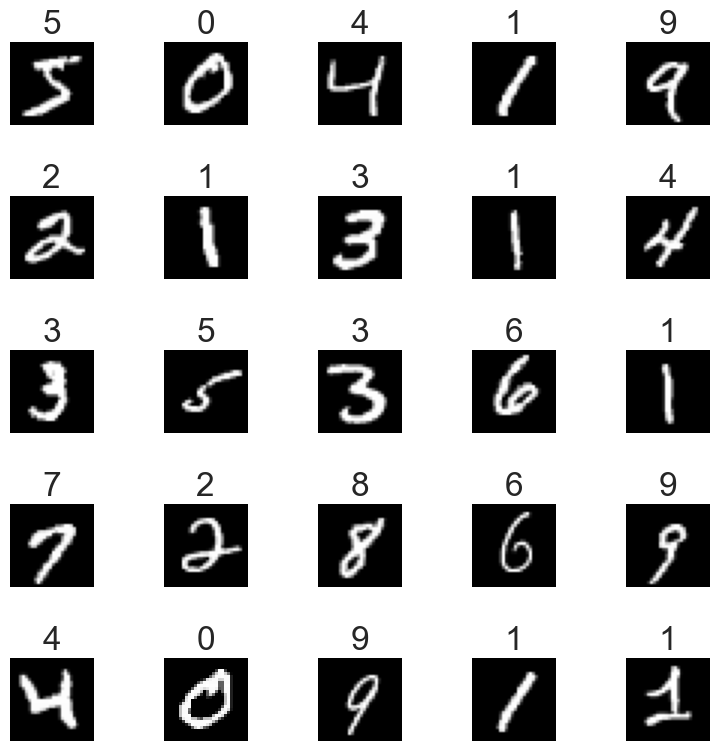

In [20]:
# Load MNIST train/test data and class labels
x_train = np.load('data/mnist_train_data.npy')
y_train = np.load('data/mnist_train_labels.npy')
x_test = np.load('data/mnist_test_data.npy')
y_test = np.load('data/mnist_test_labels.npy')

# Visualize the first 25 images
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
fig.tight_layout()

for i in range(5):
    for j in range(5):
        axs[i][j].imshow(x_train[i*5+j], cmap='gray')
        axs[i][j].axis('off')
        axs[i][j].set_title(str(y_train[i*5+j]))
        
plt.show()

In [21]:
from sklearn.decomposition import PCA

# Flatten non-leading dimensions of the train and test sets
x_test_flattened = x_test.reshape(x_test.shape[0], -1)
x_train_flattened = x_train.reshape(x_train.shape[0], -1)

# Apply PCA to reduce the number of features
n_components = 50  # experiment with different values
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)

# Normalize so that the maximum possible value in each image is 1 (and the minimum possible is 0)
x_test_pca = (x_test_pca - x_test_pca.min()) / (x_test_pca.max() - x_test_pca.min())
x_train_pca = (x_train_pca - x_train_pca.min()) / (x_train_pca.max() - x_train_pca.min())

# Train the RBF network on the PCA-transformed data
mnist_net_pca = RBF_Net(300, 10)
mnist_net_pca.train(x_train_pca[:1500], y_train[:1500].reshape((-1, 1)))
y_test_pred_pca = mnist_net_pca.predict(x_test_pca)
y_train_pred_pca = mnist_net_pca.predict(x_train_pca)


In [22]:
# train set accuracy
print(mnist_net_pca.accuracy(y_train_pred_pca, y_train))

0.92285


In [23]:
# test set accuracy
print(mnist_net_pca.accuracy(y_test_pred_pca, y_test))

0.9059


# Report + Results

In this extension, I aimed to improve the performance of the RBF network on MNIST dataset using PCA. The objective was to compress the number of features before training the RBF network by transforming the dataset(s) using PCA, which could improve the classification accuracy and runtime performance.

Firstly, I loaded the MNIST train/test data and class labels, and visualized the first 25 images using matplotlib. Then, I flattened non-leading dimensions of the train and test sets, and applied PCA to reduce the number of features, experimenting with different values for the number of components.

After that, I normalized the PCA-transformed data so that the maximum possible value in each image is 1 (and the minimum possible is 0). Then, I trained the RBF network on the PCA-transformed data with 300 hidden neurons and 10 output classes, using only the first 1500 training samples, and predicted the test and train set labels.

The RBF network achieved a train set accuracy of 0.92285 and a test set accuracy of 0.9059, indicating that PCA can indeed improve the performance of the RBF network on MNIST dataset. By compressing the number of features using PCA, we can reduce the computational time and improve the efficiency of the RBF network, while achieving comparable accuracy to the original dataset.